In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import healpy as hp
import astropy.units as u
from astropy.coordinates import SkyCoord
import glob
import os
import sys

sys.path.insert(0, '/home/aew492/lss-dipoles/code')
import tools
import generate_mocks as gm
import dipole

### load $a_{1m}$

#### CatWISE

In [5]:
result_dir = os.path.join(f'/scratch/aew492/lss-dipoles_results/results')

catname = 'catwise'
selfunc_mode = 'catwise_zodi'

dipamp = 0.0074

In [6]:
# expected
expected_dipole = dipole.cmb_dipole(amplitude=dipamp, return_amps=True)

In [7]:
expected_dipole

array([-0.00717634,  0.00155334, -0.00092047])

In [8]:
# data
fn_data = os.path.join(result_dir, 'results_data',
                    f"dipole_comps_Lambdas_{catname}_case-{selfunc_mode}.npy")
result_dict = np.load(fn_data, allow_pickle=True).item()
Lambdas = result_dict['Lambdas']
a1ms = result_dict['dipole_comps']

In [9]:
# mocks
base_rate = 72.42

dir_results = os.path.join(result_dir, 'results_mocks')
pattern = f"{dir_results}/dipole*_case-zeros-{selfunc_mode}-{dipamp:.4f}-{base_rate:.3f}*.npy"
print(pattern)
fns_mock = glob.glob(pattern)
print(f"found {len(fns_mock)} files for this mock case")

Lambdas_mocks = []
a1ms_mocks = []
for i, fn in enumerate(fns_mock):
    res = np.load(fn, allow_pickle=True).item()
    Lambdas_mocks.append(res['Lambdas'])
    a1ms_mocks.append(res['dipole_comps'])
# mean
mean_a1ms_mocks = np.mean(np.array(a1ms_mocks), axis=0)

/scratch/aew492/lss-dipoles_results/results/results_mocks/dipole*_case-zeros-catwise_zodi-0.0074-72.420*.npy
found 100 files for this mock case


#### plot data, mocks, and expected

Text(0.5, 1.0, 'Measured dipole components, catwise, selfunc=catwise_zodi')

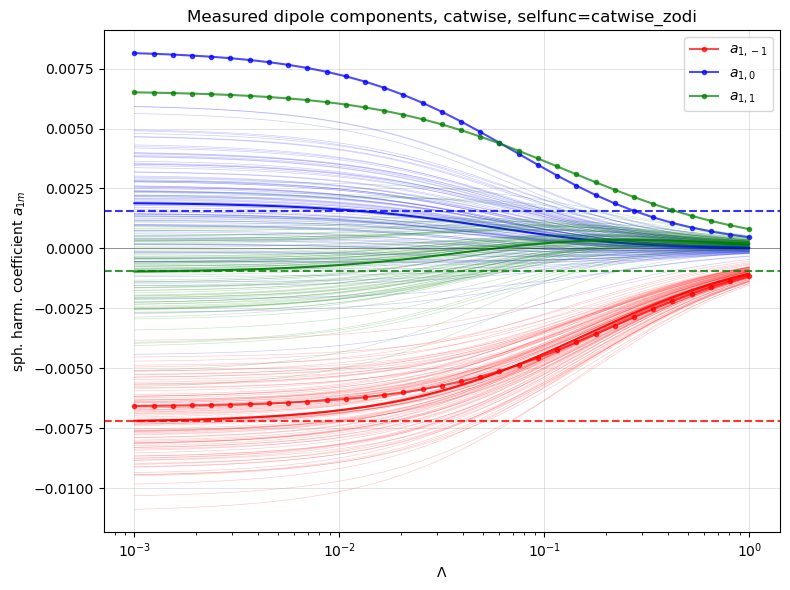

In [10]:
fig, ax = plt.subplots(figsize=(8,6), tight_layout=True)

comps = [r'$a_{1,-1}$', r'$a_{1,0}$', r'$a_{1,1}$']
cs = ['r', 'b', 'g']

for i, comp in enumerate(comps):
    # data
    ax.plot(Lambdas, a1ms[:,i], '.-', alpha=0.7, c=cs[i], label=comp)
    # mocks
    for j, a1ms_mock in enumerate(a1ms_mocks):
        ax.plot(Lambdas_mocks[j], a1ms_mock[:,i], lw=0.5, alpha=0.2, c=cs[i])
    ax.plot(Lambdas_mocks[0], mean_a1ms_mocks[:,i], alpha=0.9, c=cs[i])
    ax.axhline(expected_dipole[i], c=cs[i], alpha=0.8, ls='--')
ax.semilogx()
ax.grid(alpha=0.5, lw=0.5)
ax.axhline(0., c='k', alpha=0.5, lw=0.5)
ax.set_xlabel(r'$\Lambda$')
ax.set_ylabel(r'sph. harm. coefficient $a_{1m}$')
ax.legend()
ax.set_title(f'Measured dipole components, {catname}, selfunc={selfunc_mode}')

### Quaia

In [11]:
result_dir = os.path.join(f'/scratch/aew492/lss-dipoles_results/results')

catname = 'quaia_G20.0'
selfunc_mode = 'quaia_G20.0_orig'

dipamp = 0.0052

In [13]:
# expected
expected_dipole = dipole.cmb_dipole(amplitude=dipamp, return_amps=True)
expected_dipole

array([-0.00504284,  0.00109153, -0.00064682])

In [14]:
# data
fn_data = os.path.join(result_dir, 'results_data',
                    f"dipole_comps_Lambdas_{catname}_case-{selfunc_mode}.npy")
result_dict = np.load(fn_data, allow_pickle=True).item()
Lambdas = result_dict['Lambdas']
a1ms = result_dict['dipole_comps']

In [15]:
# mocks
base_rate = 33.64

dir_results = os.path.join(result_dir, 'results_mocks')
pattern = f"{dir_results}/dipole*_case-zeros-{selfunc_mode}-{dipamp:.4f}-{base_rate:.3f}*.npy"
print(pattern)
fns_mock = glob.glob(pattern)
print(f"found {len(fns_mock)} files for this mock case")

Lambdas_mocks = []
a1ms_mocks = []
for i, fn in enumerate(fns_mock):
    res = np.load(fn, allow_pickle=True).item()
    Lambdas_mocks.append(res['Lambdas'])
    a1ms_mocks.append(res['dipole_comps'])
# mean
mean_a1ms_mocks = np.mean(np.array(a1ms_mocks), axis=0)

/scratch/aew492/lss-dipoles_results/results/results_mocks/dipole*_case-zeros-quaia_G20.0_orig-0.0052-33.640*.npy
found 100 files for this mock case


#### plot data, mocks, and expected

Text(0.5, 1.0, 'Measured dipole components, quaia_G20.0, selfunc=quaia_G20.0_orig')

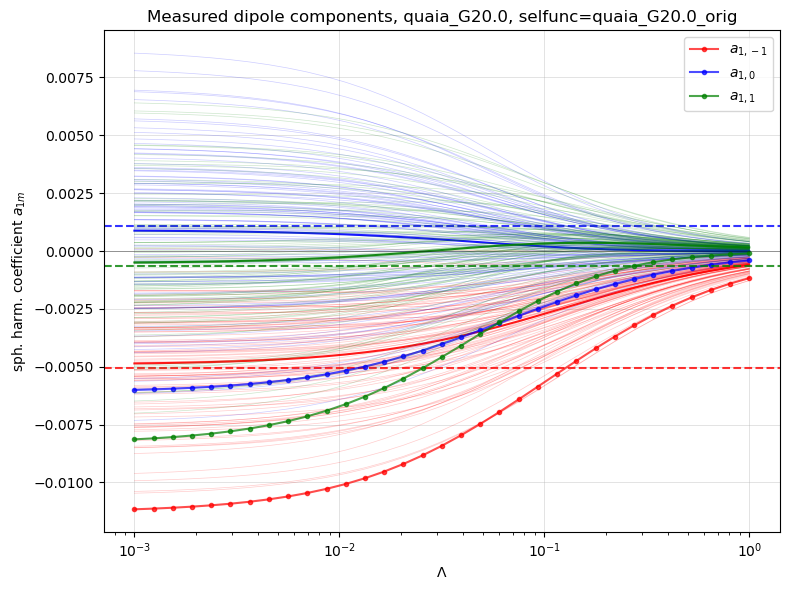

In [16]:
fig, ax = plt.subplots(figsize=(8,6), tight_layout=True)

comps = [r'$a_{1,-1}$', r'$a_{1,0}$', r'$a_{1,1}$']
cs = ['r', 'b', 'g']

for i, comp in enumerate(comps):
    # data
    ax.plot(Lambdas, a1ms[:,i], '.-', alpha=0.7, c=cs[i], label=comp)
    # mocks
    for j, a1ms_mock in enumerate(a1ms_mocks):
        ax.plot(Lambdas_mocks[j], a1ms_mock[:,i], lw=0.5, alpha=0.2, c=cs[i])
    ax.plot(Lambdas_mocks[0], mean_a1ms_mocks[:,i], alpha=0.9, c=cs[i])
    ax.axhline(expected_dipole[i], c=cs[i], alpha=0.8, ls='--')
ax.semilogx()
ax.grid(alpha=0.5, lw=0.5)
ax.axhline(0., c='k', alpha=0.5, lw=0.5)
ax.set_xlabel(r'$\Lambda$')
ax.set_ylabel(r'sph. harm. coefficient $a_{1m}$')
ax.legend()
ax.set_title(f'Measured dipole components, {catname}, selfunc={selfunc_mode}')